---
title: Lab 2 Avocado Prices
author: Sneha Narayanan
format:
    html:
        toc: true
        code-fold: true
embed-resources: true
theme: "Lumen"

---

In [17]:
import pandas as pd

# 0. Import the data and declare your package dependencies

In [105]:
data = pd.read_csv('avocado-updated-2020.csv')

# 1. Briefly describe the data set. What information does it contain?

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


In [107]:
data.head(10)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington
5,2015-01-04,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,organic,2015,Baltimore/Washington
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
7,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston
9,2015-01-04,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.0,organic,2015,Boston


1. Date: The date of the observation, formatted as YY/MM/DD/.

    
2. Average Price: The average price of a single avocado 


3. Total Volume: The total quantity of avocados sold on that date.


4. PLU Codes (4046, 4225, 4770): The total quantity of avocados sold for each specific PLU (Price Look-Up) code. 


5. Total Bags: The total number of avocado bags sold.


6. Bag Sizes (Small, Large, Xlarge): The quantity of bags sold, broken down by size (small, large, extra-large).


7. Type: The type of avocado, either conventional or organic.


8. Year: The year of the observation.


9. Geography: The region or city where the observation was recorded

The dataset contains 33,045 rows and 13 columns. It includes both numerical and categorical data. Numerical columns, such as prices, sales volumes, and bag quantities, are represented as either floating-point numbers or integers. Categorical columns, which include details like the date, type of avocado, and geographic region, are stored as text.

In [108]:
data['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [109]:
data['4046']

0           2819.50
1             57.42
2         364302.39
3           1500.15
4          53987.31
            ...    
33040      67544.48
33041    1352877.53
33042      13273.75
33043     234688.01
33044       1236.96
Name: 4046, Length: 33045, dtype: float64

# 2. Clean the data in any way you see fit.

In [110]:
major_regions = ['Northeast', 'Southeast', 'West']
state_regions = ['California', 'Great Lakes', 'Midsouth', 'Plains', 'South Carolina', 'South Central']
metro_regions = [
    'Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston', 'Buffalo/Rochester', 'Charlotte', 
    'Chicago', 'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids',
    'Harrisburg/Scranton', 'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville', 'Las Vegas', 
    'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale', 'Nashville', 'New Orleans/Mobile', 'New York', 
    'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh', 'Portland', 
    'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego', 'San Francisco', 
    'Seattle', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa'
]

In [111]:
data['major_region'] = data['geography'].where(data['geography'].isin(major_regions))
data['state_region'] = data['geography'].where(data['geography'].isin(state_regions))
data['metro_region'] = data['geography'].where(data['geography'].isin(metro_regions))

In [112]:
data

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,major_region,state_region,metro_region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,NaN,NaN,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,NaN,NaN,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,NaN,NaN,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,NaN,NaN,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,NaN,NaN,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,NaN,NaN,NaN
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,West,NaN,NaN
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,West,NaN,NaN
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,NaN,NaN,NaN


In [113]:
data.drop(columns=['geography'], inplace=True)

In [114]:
data

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,major_region,state_region,metro_region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,NaN,NaN,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,NaN,NaN,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,NaN,NaN,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,NaN,NaN,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,NaN,NaN,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,NaN,NaN,NaN
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,NaN,NaN
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,NaN,NaN
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,NaN,NaN,NaN


In [115]:
data.rename(columns={'4046': 'plu_4046', '4225': 'plu_4225', '4770': 'plu_4770'}, inplace=True)

These numbers represent PLU(price look up) codes for different avocado types 

In [116]:
avocado_clean = data

In [117]:
avocado_clean

,date,average_price,total_volume,plu_4046,plu_4225,plu_4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,major_region,state_region,metro_region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,NaN,NaN,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,NaN,NaN,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,NaN,NaN,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,NaN,NaN,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,NaN,NaN,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,NaN,NaN,NaN
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,NaN,NaN
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,NaN,NaN
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,NaN,NaN,NaN


# 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [31]:
avocado_clean[(avocado_clean['year'] == 2017) & (avocado_clean['type'] == 'organic')]

,date,average_price,total_volume,plu_4046,plu_4225,plu_4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,major_region,state_region,metro_region
11232,2017-01-01,1.87,1376.70,71.65,192.63,0.00,1112.42,1112.42,0.00,0.00,organic,2017,NaN,NaN,Albany
11234,2017-01-01,1.81,5342.85,956.73,2862.95,0.00,1523.17,5.55,1517.62,0.00,organic,2017,NaN,NaN,Atlanta
11236,2017-01-01,1.92,13901.46,1420.47,6298.07,325.44,5857.48,5857.48,0.00,0.00,organic,2017,NaN,NaN,Baltimore/Washington
11238,2017-01-01,1.05,2823.82,0.00,368.63,0.00,2455.19,577.91,1877.28,0.00,organic,2017,NaN,NaN,Boise
11240,2017-01-01,2.06,13438.22,14.80,2181.53,0.00,11241.89,10636.25,605.64,0.00,organic,2017,NaN,NaN,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16944,2017-12-31,1.20,4873.10,51.97,54.57,0.00,4766.56,3051.42,1715.14,0.00,organic,2017,NaN,NaN,Syracuse
16946,2017-12-31,1.59,5528.74,76.28,474.42,0.00,4978.04,4716.25,261.79,0.00,organic,2017,NaN,NaN,Tampa
16948,2017-12-31,1.52,1243940.09,120545.76,248123.56,1279.48,873874.64,723304.51,150460.36,109.77,organic,2017,NaN,NaN,NaN
16950,2017-12-31,1.48,229477.07,26883.07,53165.30,86.61,149342.09,66254.72,82977.60,109.77,organic,2017,West,NaN,NaN


In [32]:
avocado_clean[(avocado_clean['year'] == 2017) & (avocado_clean['type'] == 'organic')] \
                   .groupby('major_region')['plu_4046'].sum().idxmax()

'West'

In [33]:
avocado_clean[(avocado_clean['year'] == 2017) & (avocado_clean['type'] == 'organic')] \
                  .groupby('major_region')['plu_4046'].sum().max()

1870206.29

# 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [118]:
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])

avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day

avocado_clean.groupby('month')['total_volume'].mean()

month
1     9.853122e+05
2     1.095374e+06
3     9.957150e+05
4     1.016582e+06
5     1.123632e+06
6     1.051247e+06
7     9.832681e+05
8     9.499249e+05
9     9.064773e+05
10    8.446863e+05
11    8.223470e+05
12    8.076695e+05
Name: total_volume, dtype: float64

**The month with the highest average volume of avocado sales is May (5), with a total average volume of 1.123632 million units**

# 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

In [119]:
top_metro_regions = avocado_clean.groupby('metro_region')['total_volume'].mean().nlargest(5).index

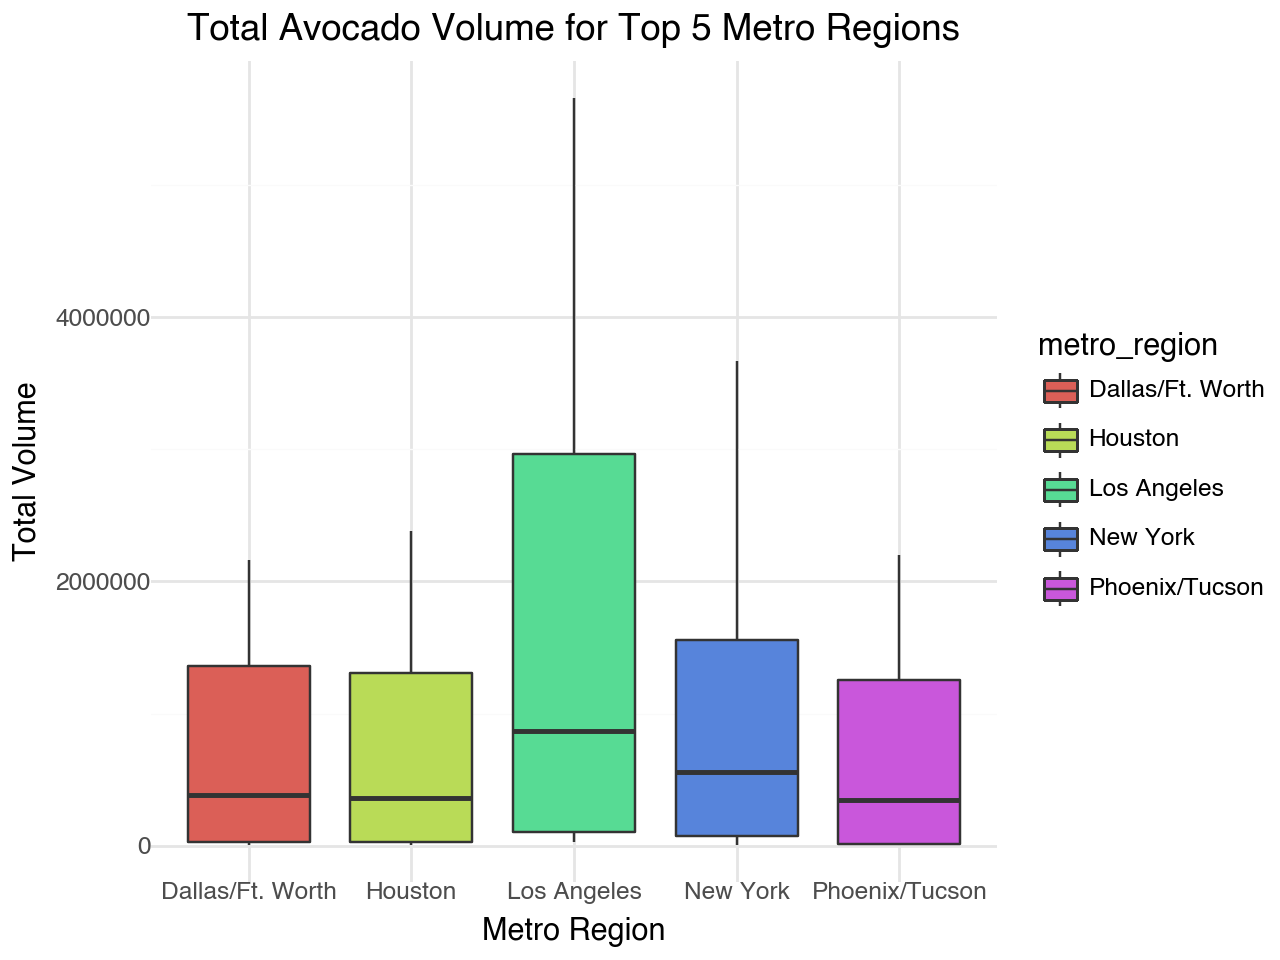

In [120]:
from plotnine import *

plot = (ggplot(avocado_clean[avocado_clean['metro_region'].isin(top_metro_regions)], 
                 aes(x='metro_region', y='total_volume',fill='metro_region')) +
        geom_boxplot() +
        labs(title='Total Avocado Volume for Top 5 Metro Regions',
             x='Metro Region',
             y='Total Volume') +
        theme(axis_text_x=element_text(rotation=45, hjust=1)) +
        theme_minimal()
)

plot.show()

# 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [121]:
california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
california_data = avocado_clean[avocado_clean['metro_region'].isin(california_regions)]

# 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [122]:
summary_stats = california_data.groupby(['metro_region', 'type'])['average_price'].agg(['mean']).reset_index()

price_difference = summary_stats.pivot(index='metro_region', columns='type', values='mean')
price_difference['price_diff'] = price_difference['organic'] - price_difference['conventional']
most_different_region = price_difference['price_diff'].idxmax()

print(summary_stats)
print(price_difference)

    metro_region          type      mean
0    Los Angeles  conventional  1.047124
1    Los Angeles       organic  1.574902
2     Sacramento  conventional  1.295359
3     Sacramento       organic  1.873856
4      San Diego  conventional  1.113856
5      San Diego       organic  1.798366
6  San Francisco  conventional  1.400490
7  San Francisco       organic  2.119444
type           conventional   organic  price_diff
metro_region                                     
Los Angeles        1.047124  1.574902    0.527778
Sacramento         1.295359  1.873856    0.578497
San Diego          1.113856  1.798366    0.684510
San Francisco      1.400490  2.119444    0.718954


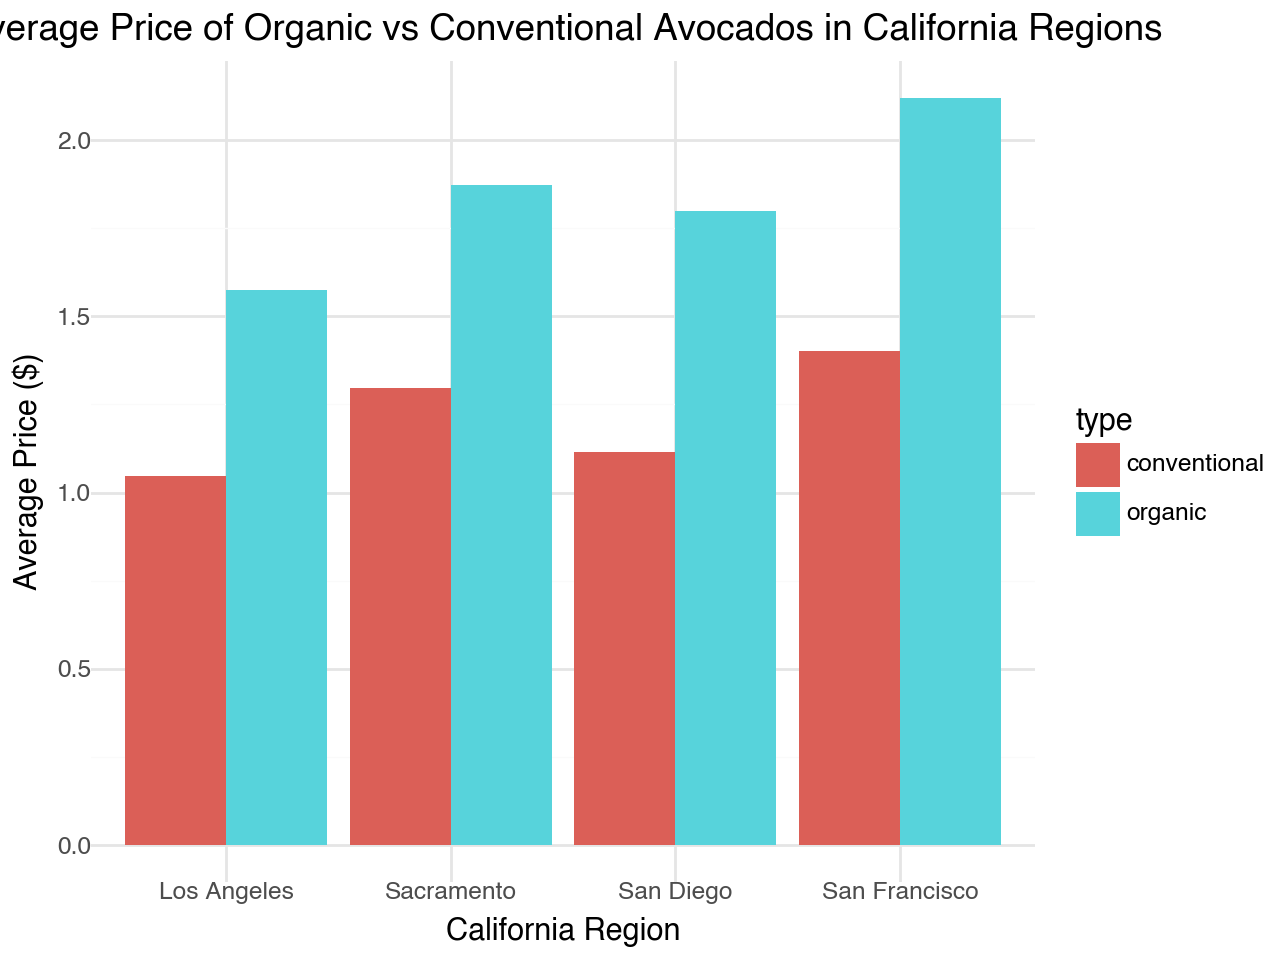

In [44]:
plot = (ggplot(summary_stats, aes(x='metro_region', y='mean', fill='type')) +
        geom_bar(stat='identity', position='dodge') +
        labs(title='Average Price of Organic vs Conventional Avocados in California Regions',
             x='California Region',
             y='Average Price ($)') +
        theme(axis_text_x=element_text(rotation=45, hjust=1)) +
        theme_minimal()
)

plot.show()

# 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [123]:
california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
california_data = avocado_clean[avocado_clean['metro_region'].isin(california_regions)]


pivot_data = california_data.melt(id_vars=['metro_region', 'type'], 
                                   value_vars=['xlarge_bags','large_bags','small_bags'],
                                   var_name='size', 
                                   value_name='volume')

pivot_data['proportion'] = pivot_data.groupby(['metro_region', 'type'])['volume'].transform(lambda x: x / x.sum())

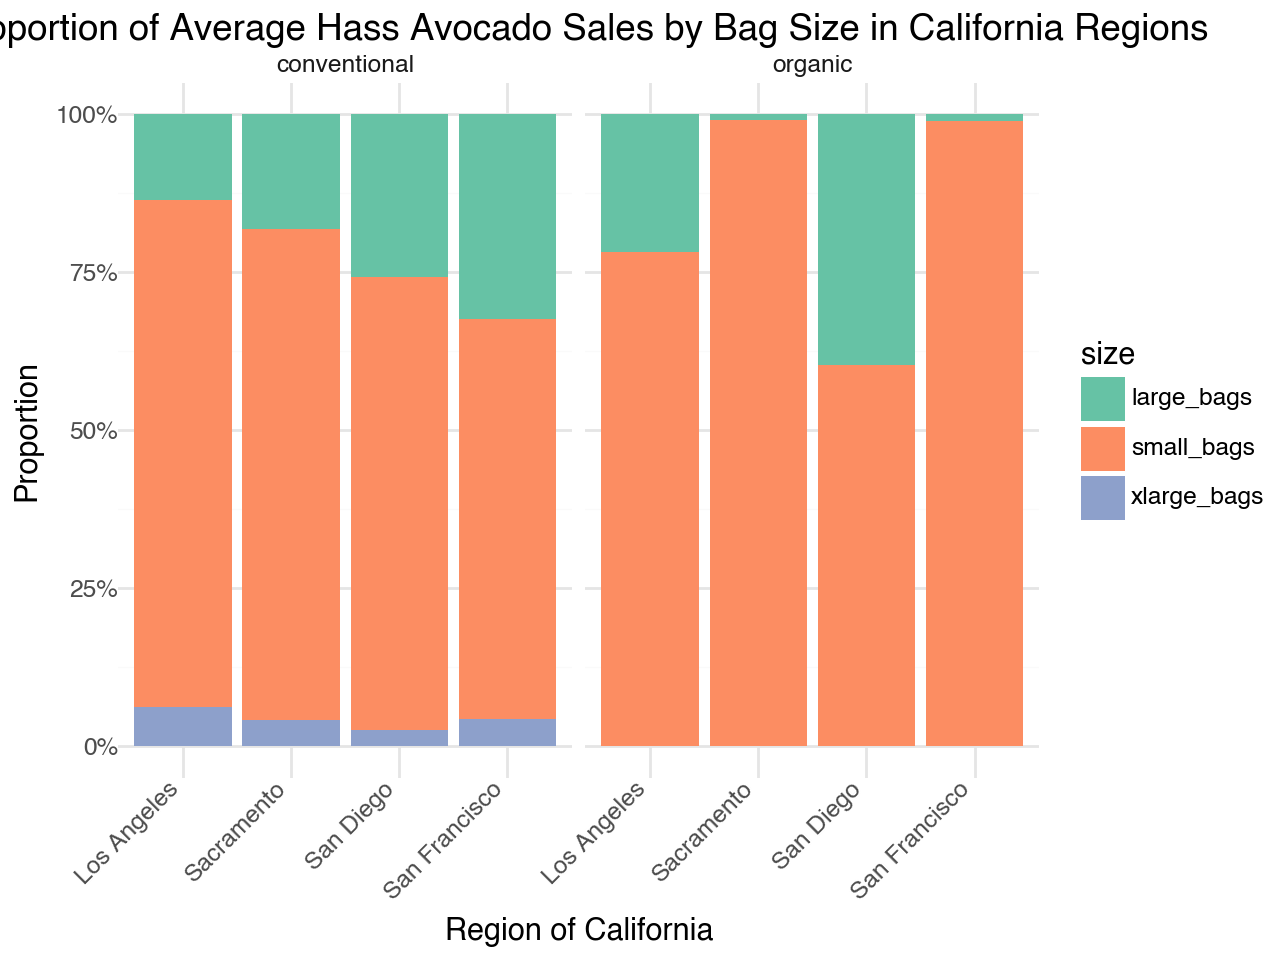

In [126]:
plot = (ggplot(pivot_data, aes(x='metro_region', y='proportion', fill='size')) +
        geom_bar(stat='identity', position='fill') +  
        facet_wrap('~type', ncol=2) +
        labs(title='Proportion of Average Hass Avocado Sales by Bag Size in California Regions',
             x='Region of California',
             y='Proportion') +
        scale_y_continuous(labels=lambda l: ["{:.0f}%".format(v * 100) for v in l]) +
        scale_fill_brewer(type='qual', palette='Set2') +
        theme_minimal() +
        theme(axis_text_x=element_text(rotation=45, hjust=1))
)

plot.show()

In [74]:
california_data

,date,average_price,total_volume,plu_4046,plu_4225,plu_4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,major_region,state_region,metro_region,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,NaN,NaN,Los Angeles,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,NaN,NaN,Los Angeles,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,NaN,NaN,Sacramento,1,4
81,2015-01-04,1.33,9213.49,3727.52,4327.52,0.00,1158.45,1158.45,0.00,0.00,organic,2015,NaN,NaN,Sacramento,1,4
82,2015-01-04,0.94,461607.33,244152.26,165299.33,15302.75,36852.99,30884.29,5595.00,373.70,conventional,2015,NaN,NaN,San Diego,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33018,2020-11-29,1.43,23531.38,3303.69,2057.03,0.00,18170.66,18144.54,26.12,0.00,organic,2020,NaN,NaN,Sacramento,11,29
33019,2020-11-29,1.12,469356.72,104509.99,19988.45,7210.47,337647.81,189341.36,127701.64,20604.81,conventional,2020,NaN,NaN,San Diego,11,29
33020,2020-11-29,1.95,25799.95,894.63,838.11,0.00,24067.21,9691.46,14375.75,0.00,organic,2020,NaN,NaN,San Diego,11,29
33021,2020-11-29,1.50,644141.37,128555.43,136718.24,5597.21,373270.49,159276.65,207760.32,6233.52,conventional,2020,NaN,NaN,San Francisco,11,29


# Using Outside Data

In [59]:
house_data= pd.read_csv('Metro_sales_count_now_uc_sfrcondo_month.csv')

In [78]:
house_data= pd.read_csv('Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [79]:
house_data

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31
0,102001,0,United States,country,NaN,122710.838539,122926.726242,123194.458782,123768.692526,124429.566719,...,353806.242676,354242.717001,354677.065211,355473.042348,357021.050068,358884.957514,360324.712897,360888.668935,361037.327498,361281.717048
1,394913,1,"New York, NY",msa,NY,218233.216724,219160.584763,220096.541902,221993.153236,223957.159952,...,636475.270504,639265.650987,642178.317205,646255.694516,651704.395720,657863.854229,662561.428749,665667.764258,668437.168324,672210.970325
2,753899,2,"Los Angeles, CA",msa,CA,222104.914025,222931.426109,224032.332323,226222.765868,228618.413461,...,921146.559682,926554.539271,926708.887683,923740.986284,922618.466845,926105.996730,932034.718291,936012.934083,940417.087163,945635.978294
3,394463,3,"Chicago, IL",msa,IL,153956.315498,154098.834197,154370.263570,155045.512395,155857.755512,...,311275.135372,311913.816691,312578.140750,313972.158826,316395.381263,319279.856054,321409.733463,322638.674660,323378.146509,324304.487366
4,394514,4,"Dallas, TX",msa,TX,126111.301852,126167.472266,126232.045908,126399.736872,126620.832817,...,372438.862159,372112.028509,372133.731174,372616.126553,373774.335129,374743.310085,374887.158218,374222.635105,373283.837228,372632.458458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,120015.240233,117999.366435,116327.290033,115531.327700,115647.054154,117093.295057,118733.490769,119777.795013,119979.939410,119660.131384
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,389503.102147,386975.900770,386745.123324,386865.722805,388573.029165,390099.034124,391224.951634,391294.359700,390525.466709,390474.629213
892,753874,937,"Craig, CO",msa,CO,99149.865096,99403.398235,99875.410524,100547.599622,101328.729369,...,286332.371116,286283.414749,285513.810445,285444.674126,285909.420292,286693.052199,287599.111651,287939.692207,288264.439574,288493.671932
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,92069.745535,90713.155237,89982.173531,90032.019363,90682.462894,91416.230305,92060.171073,92320.345967,92119.632898,91640.824659


The values under each month is the Sales Count Nowcast is the estimated number of unique properties that sold during the month after accounting for the latency between when sales occur and when they are reported.

In [80]:
columns = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30','2024-05-31','2024-06-30','2024-07-31','2024-08-31']
house_data = house_data[columns] 

In [81]:
house_data

,RegionID,SizeRank,RegionName,RegionType,StateName,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31
0,102001,0,United States,country,NaN,354677.065211,355473.042348,357021.050068,358884.957514,360324.712897,360888.668935,361037.327498,361281.717048
1,394913,1,"New York, NY",msa,NY,642178.317205,646255.694516,651704.395720,657863.854229,662561.428749,665667.764258,668437.168324,672210.970325
2,753899,2,"Los Angeles, CA",msa,CA,926708.887683,923740.986284,922618.466845,926105.996730,932034.718291,936012.934083,940417.087163,945635.978294
3,394463,3,"Chicago, IL",msa,IL,312578.140750,313972.158826,316395.381263,319279.856054,321409.733463,322638.674660,323378.146509,324304.487366
4,394514,4,"Dallas, TX",msa,TX,372133.731174,372616.126553,373774.335129,374743.310085,374887.158218,374222.635105,373283.837228,372632.458458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,116327.290033,115531.327700,115647.054154,117093.295057,118733.490769,119777.795013,119979.939410,119660.131384
891,394743,936,"Ketchikan, AK",msa,AK,386745.123324,386865.722805,388573.029165,390099.034124,391224.951634,391294.359700,390525.466709,390474.629213
892,753874,937,"Craig, CO",msa,CO,285513.810445,285444.674126,285909.420292,286693.052199,287599.111651,287939.692207,288264.439574,288493.671932
893,395188,938,"Vernon, TX",msa,TX,89982.173531,90032.019363,90682.462894,91416.230305,92060.171073,92320.345967,92119.632898,91640.824659


In [82]:
house_data['metro_region'] = house_data['RegionName'].str.split(',').str[0]

/var/folders/73/0dj9qt2j6q55d7g3pl3ldw8h0000gn/T/ipykernel_45504/732976638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [83]:
house_data

,RegionID,SizeRank,RegionName,RegionType,StateName,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,metro_region
0,102001,0,United States,country,NaN,354677.065211,355473.042348,357021.050068,358884.957514,360324.712897,360888.668935,361037.327498,361281.717048,United States
1,394913,1,"New York, NY",msa,NY,642178.317205,646255.694516,651704.395720,657863.854229,662561.428749,665667.764258,668437.168324,672210.970325,New York
2,753899,2,"Los Angeles, CA",msa,CA,926708.887683,923740.986284,922618.466845,926105.996730,932034.718291,936012.934083,940417.087163,945635.978294,Los Angeles
3,394463,3,"Chicago, IL",msa,IL,312578.140750,313972.158826,316395.381263,319279.856054,321409.733463,322638.674660,323378.146509,324304.487366,Chicago
4,394514,4,"Dallas, TX",msa,TX,372133.731174,372616.126553,373774.335129,374743.310085,374887.158218,374222.635105,373283.837228,372632.458458,Dallas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,116327.290033,115531.327700,115647.054154,117093.295057,118733.490769,119777.795013,119979.939410,119660.131384,Zapata
891,394743,936,"Ketchikan, AK",msa,AK,386745.123324,386865.722805,388573.029165,390099.034124,391224.951634,391294.359700,390525.466709,390474.629213,Ketchikan
892,753874,937,"Craig, CO",msa,CO,285513.810445,285444.674126,285909.420292,286693.052199,287599.111651,287939.692207,288264.439574,288493.671932,Craig
893,395188,938,"Vernon, TX",msa,TX,89982.173531,90032.019363,90682.462894,91416.230305,92060.171073,92320.345967,92119.632898,91640.824659,Vernon


In [84]:
melted_house_data = house_data.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'metro_region'], 
                                     var_name='Date', 
                                     value_name='house_price')

In [85]:
melted_house_data

,RegionID,SizeRank,RegionName,RegionType,StateName,metro_region,Date,house_price
0,102001,0,United States,country,NaN,United States,2024-01-31,354677.065211
1,394913,1,"New York, NY",msa,NY,New York,2024-01-31,642178.317205
2,753899,2,"Los Angeles, CA",msa,CA,Los Angeles,2024-01-31,926708.887683
3,394463,3,"Chicago, IL",msa,IL,Chicago,2024-01-31,312578.140750
4,394514,4,"Dallas, TX",msa,TX,Dallas,2024-01-31,372133.731174
...,...,...,...,...,...,...,...,...
7155,753929,935,"Zapata, TX",msa,TX,Zapata,2024-08-31,119660.131384
7156,394743,936,"Ketchikan, AK",msa,AK,Ketchikan,2024-08-31,390474.629213
7157,753874,937,"Craig, CO",msa,CO,Craig,2024-08-31,288493.671932
7158,395188,938,"Vernon, TX",msa,TX,Vernon,2024-08-31,91640.824659


In [86]:
melted_house_data.drop('RegionName',inplace=True,axis=1)

In [87]:
melted_house_data

,RegionID,SizeRank,RegionType,StateName,metro_region,Date,house_price
0,102001,0,country,NaN,United States,2024-01-31,354677.065211
1,394913,1,msa,NY,New York,2024-01-31,642178.317205
2,753899,2,msa,CA,Los Angeles,2024-01-31,926708.887683
3,394463,3,msa,IL,Chicago,2024-01-31,312578.140750
4,394514,4,msa,TX,Dallas,2024-01-31,372133.731174
...,...,...,...,...,...,...,...
7155,753929,935,msa,TX,Zapata,2024-08-31,119660.131384
7156,394743,936,msa,AK,Ketchikan,2024-08-31,390474.629213
7157,753874,937,msa,CO,Craig,2024-08-31,288493.671932
7158,395188,938,msa,TX,Vernon,2024-08-31,91640.824659


In [88]:
data=california_data.merge(melted_house_data, on=["metro_region"])

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19584 entries, 0 to 19583
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           19584 non-null  datetime64[ns]
 1   average_price  19584 non-null  float64       
 2   total_volume   19584 non-null  float64       
 3   plu_4046       19584 non-null  float64       
 4   plu_4225       19584 non-null  float64       
 5   plu_4770       19584 non-null  float64       
 6   total_bags     19584 non-null  float64       
 7   small_bags     19584 non-null  float64       
 8   large_bags     19584 non-null  float64       
 9   xlarge_bags    19584 non-null  float64       
 10  type           19584 non-null  object        
 11  year           19584 non-null  int64         
 12  major_region   0 non-null      object        
 13  state_region   0 non-null      object        
 14  metro_region   19584 non-null  object        
 15  month          1958

In [90]:
data

,date,average_price,total_volume,plu_4046,plu_4225,plu_4770,total_bags,small_bags,large_bags,xlarge_bags,...,state_region,metro_region,month,day,RegionID,SizeRank,RegionType,StateName,Date,house_price
0,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,...,NaN,Los Angeles,1,4,753899,2,msa,CA,2024-01-31,9.267089e+05
1,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,...,NaN,Los Angeles,1,4,753899,2,msa,CA,2024-02-29,9.237410e+05
2,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,...,NaN,Los Angeles,1,4,753899,2,msa,CA,2024-03-31,9.226185e+05
3,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,...,NaN,Los Angeles,1,4,753899,2,msa,CA,2024-04-30,9.261060e+05
4,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,...,NaN,Los Angeles,1,4,753899,2,msa,CA,2024-05-31,9.320347e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19579,2020-11-29,1.87,59527.02,2815.23,4542.30,0.00,52169.49,52034.33,135.16,0.00,...,NaN,San Francisco,11,29,395057,12,msa,CA,2024-04-30,1.128663e+06
19580,2020-11-29,1.87,59527.02,2815.23,4542.30,0.00,52169.49,52034.33,135.16,0.00,...,NaN,San Francisco,11,29,395057,12,msa,CA,2024-05-31,1.141032e+06
19581,2020-11-29,1.87,59527.02,2815.23,4542.30,0.00,52169.49,52034.33,135.16,0.00,...,NaN,San Francisco,11,29,395057,12,msa,CA,2024-06-30,1.147050e+06
19582,2020-11-29,1.87,59527.02,2815.23,4542.30,0.00,52169.49,52034.33,135.16,0.00,...,NaN,San Francisco,11,29,395057,12,msa,CA,2024-07-31,1.149112e+06


# Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

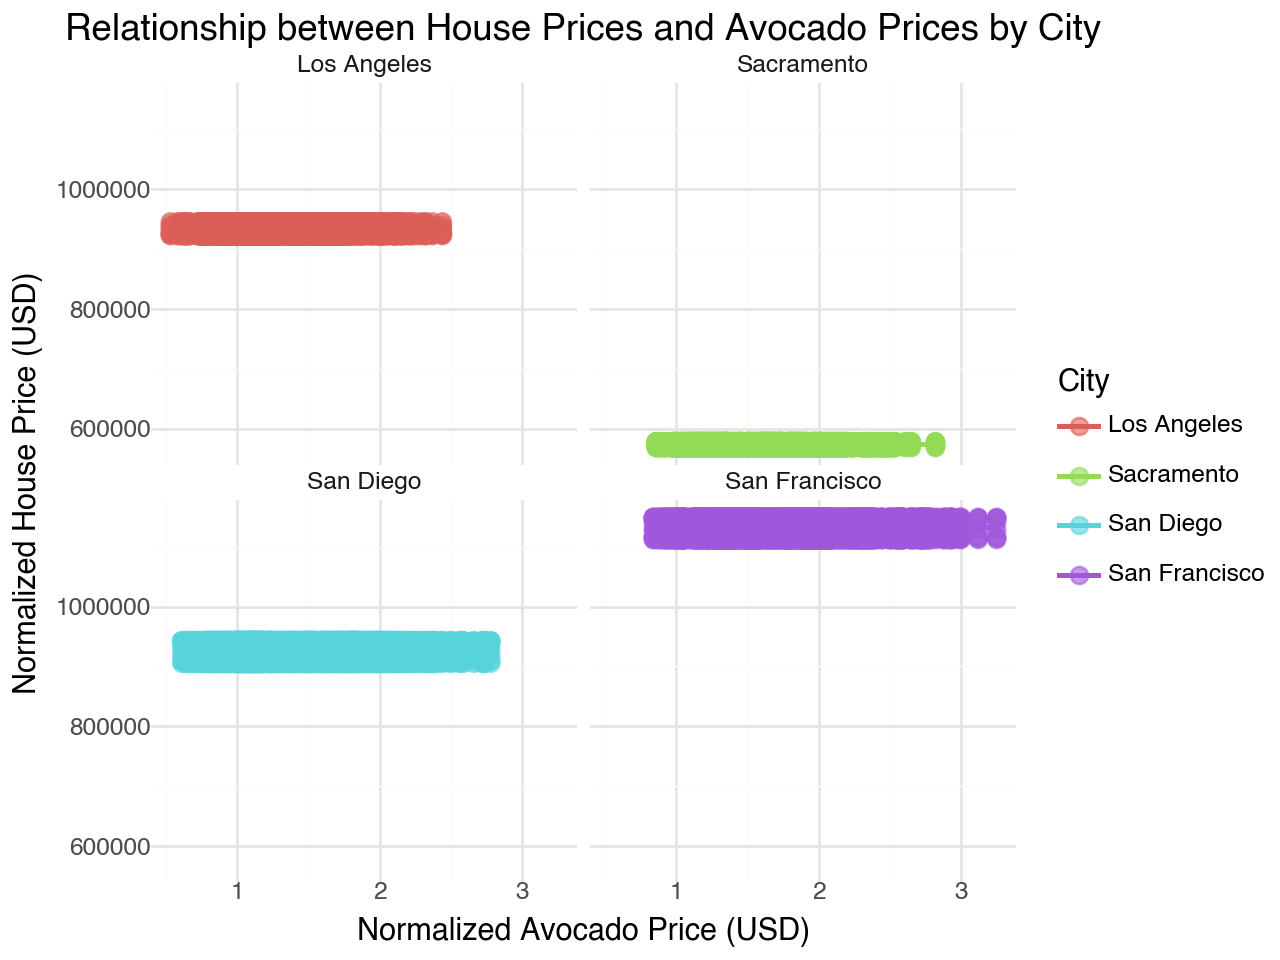

In [103]:
scatter_plot = (
    ggplot(data, aes(x='average_price', y='house_price', color='metro_region'))
    + geom_point(size=3, alpha=0.6)
    + geom_smooth(method='lm', se=False)
    + labs(
        title='Relationship between House Prices and Avocado Prices by City',
        x='Normalized Avocado Price (USD)',
        y='Normalized House Price (USD)',
        color='City'
    )
    + facet_wrap('~ metro_region') 
    + theme_minimal()
)

scatter_plot.show()

> The plot shows that there is no clear relationship between house prices and avocado prices across the four cities. While avocado prices fluctuate, house prices remain high and stable. This suggests that house prices are influenced by other factors beyond avocado prices, reflecting a strong real estate market in these areas. 

> Overall, changes in avocado prices do not significantly impact house prices.